Saving RTA Dataset.csv to RTA Dataset (3).csv
Saving cleaned.csv to cleaned (3).csv
  Age_band_of_driver Sex_of_driver   Educational_level  \
0              18-30          Male   Above high school   
1              31-50          Male  Junior high school   
2              18-30          Male  Junior high school   
3              18-30          Male  Junior high school   
4              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience   Lanes_or_Medians  \
0                Employee              1-2yr            Unknown   
1                Employee         Above 10yr  Undivided Two way   
2                Employee              1-2yr              other   
3                Employee             5-10yr              other   
4                Employee              2-5yr              other   

  Types_of_Junction Road_surface_type       Light_conditions  \
0       No junction     Asphalt roads               Daylight   
1       No junction     Asphalt road

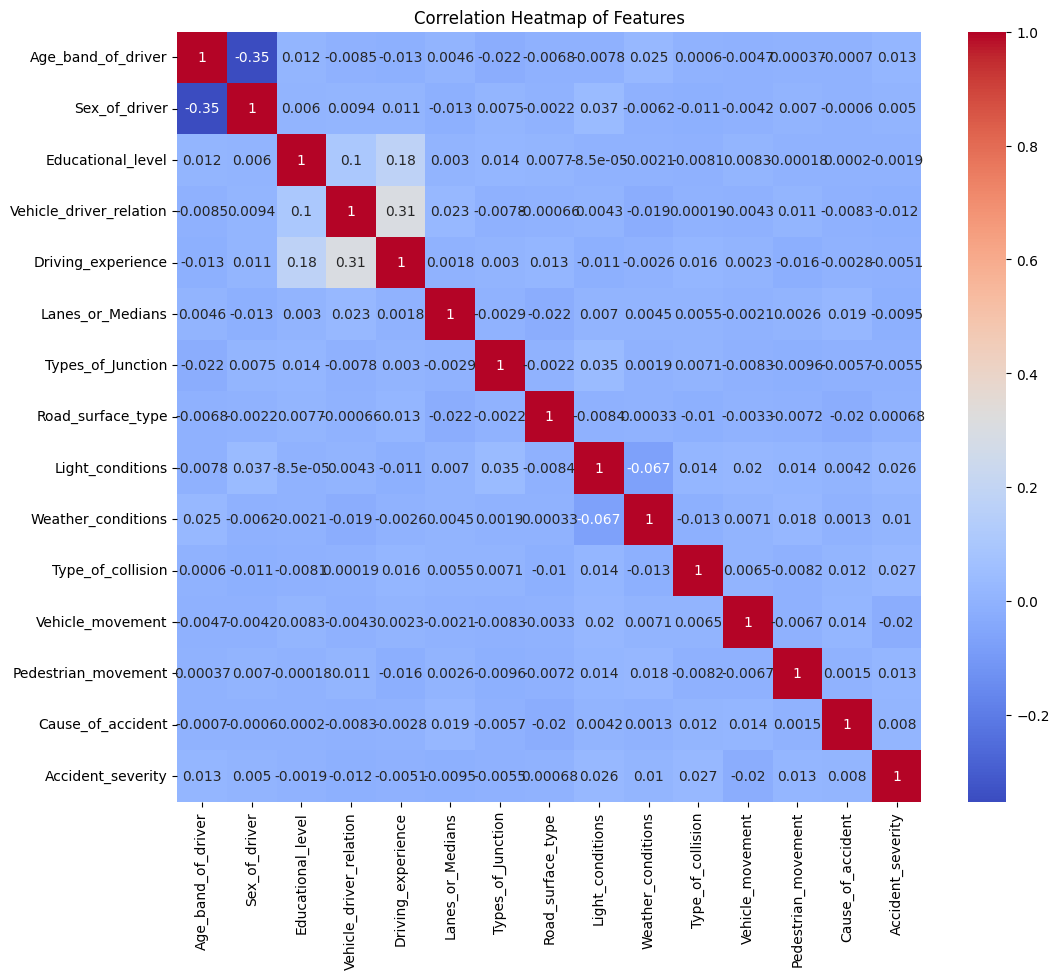

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder

# Upload the files
uploaded = files.upload()

# Load the Data
# Assuming you upload both 'cleaned.csv' and 'RTA Dataset.csv'
cleaned_df = pd.read_csv('cleaned.csv')
rta_df = pd.read_csv('RTA Dataset.csv')

# Inspect the Data
print(cleaned_df.head())
print(cleaned_df.info())
print(cleaned_df.columns)

# Convert categorical variables into numeric variables
le = LabelEncoder()
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':
        cleaned_df[column] = le.fit_transform(cleaned_df[column])

# Data Preprocessing (if needed)
# For example, converting date columns to datetime, handling missing values, etc.

# Analysis and Visualization

# Check if 'Time' column exists
if 'Time' in cleaned_df.columns:
    # Accidents by Time of Day
    plt.figure(figsize=(12, 6))
    cleaned_df['Time_of_Day'] = pd.to_datetime(cleaned_df['Time'], format='%H:%M').dt.hour
    sns.countplot(x='Time_of_Day', data=cleaned_df, palette='viridis')
    plt.title('Number of Accidents by Time of Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.show()
else:
    print("Column 'Time' not found in the dataset.")

# Check if 'Weather_Conditions' column exists
if 'Weather_Conditions' in cleaned_df.columns:
    # Accidents by Weather Conditions
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Weather_Conditions', data=cleaned_df, palette='muted')
    plt.title('Number of Accidents by Weather Conditions')
    plt.xlabel('Weather Conditions')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Weather_Conditions' not found in the dataset.")

# Check if 'Road_Surface_Conditions' column exists
if 'Road_Surface_Conditions' in cleaned_df.columns:
    # Accidents by Road Conditions
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Road_Surface_Conditions', data=cleaned_df, palette='pastel')
    plt.title('Number of Accidents by Road Surface Conditions')
    plt.xlabel('Road Surface Conditions')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Road_Surface_Conditions' not found in the dataset.")

# Check if 'Longitude' and 'Latitude' columns exist
if 'Longitude' in cleaned_df.columns and 'Latitude' in cleaned_df.columns:
    # Accident Hotspots
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Longitude', y='Latitude', hue='Severity', data=cleaned_df, palette='coolwarm', alpha=0.6)
    plt.title('Accident Hotspots')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print("Columns 'Longitude' and/or 'Latitude' not found in the dataset.")

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation = cleaned_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()